In [1]:
import numpy as np
import pandas as pd
import eli5
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Import dataset
students = pd.read_csv('student-mat.csv', sep=";")

In [3]:
# Drop G1 and G2 because they will not be considered
students = students.drop(columns = ["G1", "G2"])

In [4]:
X, y = students.drop(columns = ["G3"]), students[["G3"]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
# pipelines for numeric attributes and categorical attributes
num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scalar", StandardScaler())])
cat_pipe = OneHotEncoder(handle_unknown="ignore")

In [7]:
### Bagging Regressor Ensemble #### Declare numeric attributes and categorical attributes
num_attributes = list(students.drop(columns = ["school", "sex", "address", "famsize", "Pstatus",
                              "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                              "famsup", "paid", "activities", "nursery", "higher",
                              "internet", "romantic", "G3"]))
cat_attributes = ["school", "sex", "address", "famsize", "Pstatus",
                  "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                  "famsup", "paid", "activities", "nursery", "higher",
                  "internet", "romantic"]

In [8]:
# pipelines for numeric attributes and categorical attributes
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
cat_pipe = Pipeline(steps=[('onehot', OneHotEncoder())])

In [9]:
# Combine the num and cat pipes
full_pipe = ColumnTransformer(transformers=[
        ('num', num_pipe, num_attributes),
        ('cat', cat_pipe, cat_attributes)])

In [10]:
# Combine the pipeline for the model
tree_reg = Pipeline(steps=[('preprocessor', full_pipe), ('regressor', DecisionTreeRegressor(max_depth=5))])

In [11]:
# Train the model
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences']),
                                                 ('cat',
                                                  Pipeline(steps=[('o

In [12]:
# Get list of headers out of the pipeline from the ohe
onehot_headers = list(tree_reg.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names(input_features=cat_attributes))

In [13]:
# Combine lists of attributes
num_attributes_list = list(num_attributes)
num_attributes_list.extend(onehot_headers)

In [14]:
# Using the ELI5 library to show the list of weights by feature
eli5.explain_weights(tree_reg.named_steps['regressor'], top=10, feature_names=num_attributes_list, feature_filter=lambda x: x != '<BIAS>')

C:\Users\funny\anaconda3\lib\site-packages\eli5\sklearn\treeinspect.py:64: RuntimeWarning: invalid value encountered in true_divide
  value_ratio=list(value / value.sum()),


Weight,Feature
0.3276,absences
0.2543,failures
0.1163,health
0.0901,goout
0.0628,schoolsup_no
0.0329,Fjob_teacher
0.0319,age
0.0217,traveltime
0.0178,freetime
0.0166,studytime


In [15]:
# Import packages for visualizing the decision tree properly
import graphviz
from IPython.display import display
from sklearn.tree import export_graphviz

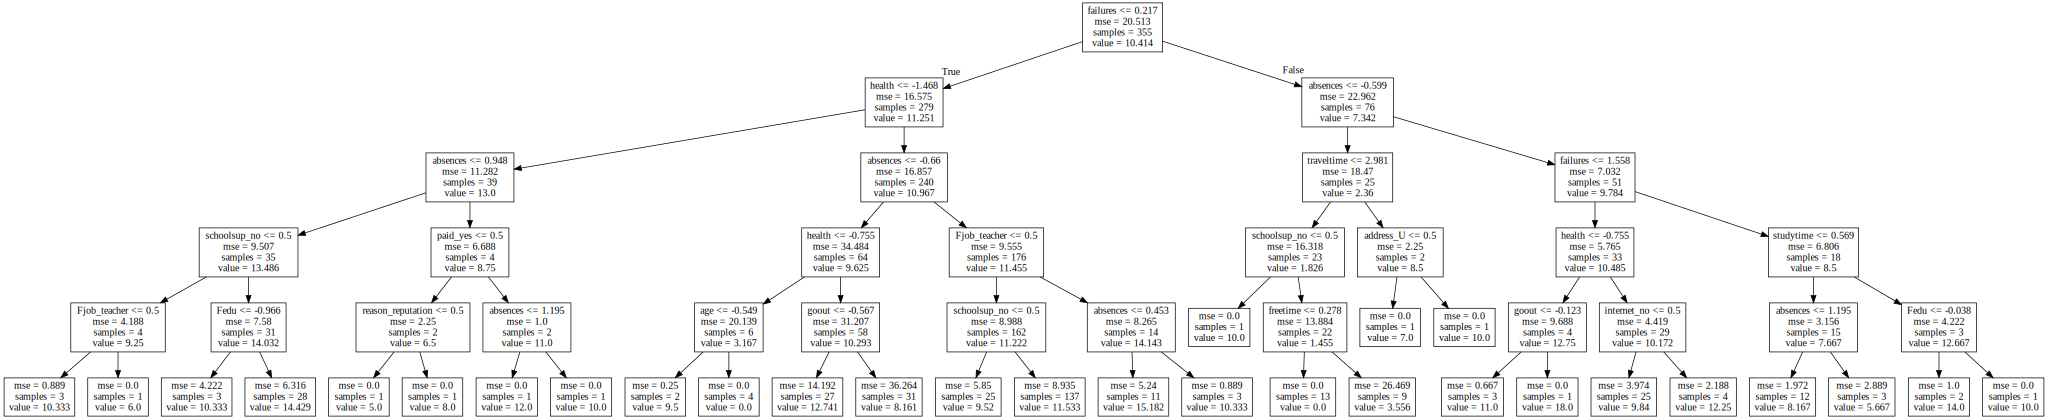

In [16]:
# Display 
display(graphviz.Source(export_graphviz(tree_reg['regressor'], feature_names=num_attributes_list)))